<a href="https://colab.research.google.com/github/ameschini2206/Segunda-Entrega/blob/main/ProyectoDS_ParteI_Alejandro_Meschini%20p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Primera Entrea - Visualizaciones en Python  
## Primera Entrega  
### Archivo: ProyectoDS_ParteI_Alejandro_Meschini.ipynb

---


## Abstract

En este proyecto trabajamos con el dataset autoelevadores_argentina.csv (este dataset fue creado con chatgpt y formó parte del proyecto entregado en el curso de data analytics) que contiene información sobre venta de autoleevadores, indicando fecha, marca, modelo, horas de uso y demas cuestiones relacionado con la venta.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en la venta de autoelevadores en Argentina. A través de gráficos univariados, bivariados y multivariados, se buscará responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.

El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar una interpretación que permita entender mejor el fenómeno analizado.

El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación, y preparación para análisis posteriores como modelado o segmentación.

---

## Preguntas de interés / Hipótesis

1. ¿Que tipo de equipo es el mas vendido?

2. ¿Existe relación entre precio y horas de uso?

2. ¿Qué factores influyen más en el precio (marca, estado, capacidad, provincia)?

3. ¿Se pueden diferenciar grupos de equipos según estado, capacidad y horas?

4. ¿Qué variable numérica presenta mayor variabilidad? ¿Hay outliers?

5. ¿Cómo se distribuye el precio según la provincia y la marca?
---

## Objetivo del Proyecto

El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar Estimar el precio esperado de un autoelevador en función de sus características con las siguientes variables predictoras: Marca, modelo, capacidad, altura de torre, estado, método de pago, horas de uso, año de fabricación, provincia.

---

##  Visualizaciones y Análisis

### 1. Análisis univariado

- Histograma y KDE del precio.

- Gráfico de barras de estado y provincia.

- Estadísticos descriptivos (media, mediana, std).


---

### 2. Análisis bivariado

- Boxplot de precio vs estado.

- Scatterplot de precio vs horas de uso.

- Matriz de correlaciones numéricas.


---

### 3. Análisis multivariado (mínimo 3 variables)

- Scatter 3D (precio vs horas, color por estado, tamaño por capacidad).

- Heatmap de correlaciones.

- Gráfico de violín: precio vs estado con hue por marca.

---

## Valores perdidos

- Cantidad y porcentaje de valores nulos por columna
- Decisión: eliminación / imputación / análisis posterior


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/Primera-entrega/refs/heads/main/autoelevadores_argentina.csv'
df = pd.read_csv(url_proyecto)
df.head()



,ID_venta,Fecha_venta,Marca,Modelo,Tipo,Capacidad_kg,Altura_m,Precio_USD,Provincia,Cliente_tipo,Año_fabricación,Horas_uso,Estado,Método_pago,Vendedor
0,VENT00001,2024-05-04,Yale,ERP030,eléctrico,2500.0,5.9,39112.42,Chubut,distribuidor,2023,3033.0,usado,leasing,Forklift Solutions
1,VENT00002,2024-06-28,Linde,E16,eléctrico,3500.0,5.3,28201.26,Santa Fe,distribuidor,2021,2804.0,reacondicionado,leasing,Grupo Industrial SA
2,VENT00003,2022-11-15,Linde,H25D,diésel,3500.0,4.7,32829.90,Mendoza,particular,2024,4370.0,reacondicionado,contado,Potencia SRL
3,VENT00004,2023-10-21,Toyota,TX30,gas,3000.0,5.0,42927.15,Buenos Aires,particular,2024,2829.0,usado,leasing,Autoelevadores Norte
4,VENT00005,2024-11-16,Toyota,TX30,gas,2000.0,3.3,39940.46,Santa Fe,particular,2024,0.0,nuevo,crédito,Potencia SRL


## Missing Values

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Altura_m,70
Capacidad_kg,70
Precio_USD,70
Horas_uso,70


Se observan valores faltantes en altura de torre, capacidad en kg, en precio y en horas de uso. Luego se analizará si es necesario dejarlos o imputarlos según los analisis siguientes.

#1. Análisis univariado

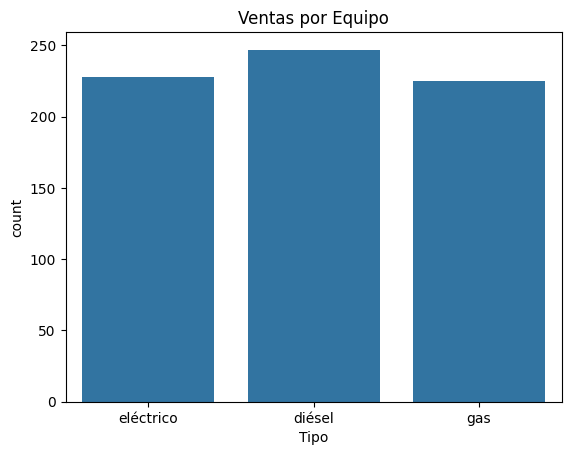

In [ ]:
sns.countplot(x='Tipo', data=df)
plt.title('Ventas por Equipo')
plt.show()

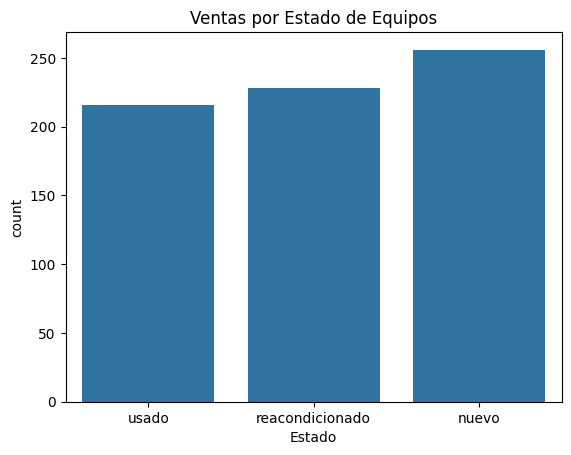

In [ ]:
sns.countplot(x='Estado', data=df)
plt.title('Ventas por Estado de Equipos')
plt.show()

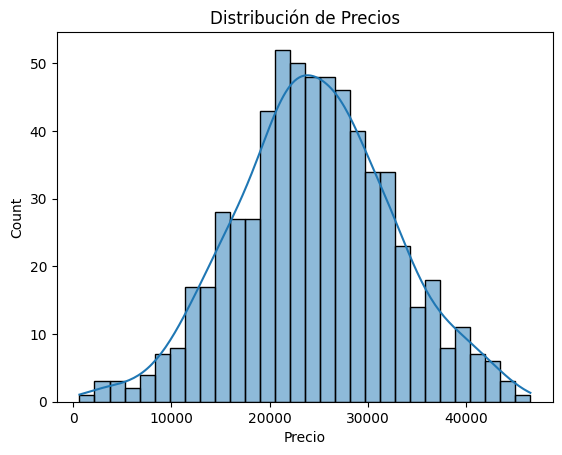

In [ ]:
sns.histplot(df['Precio_USD'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.show()

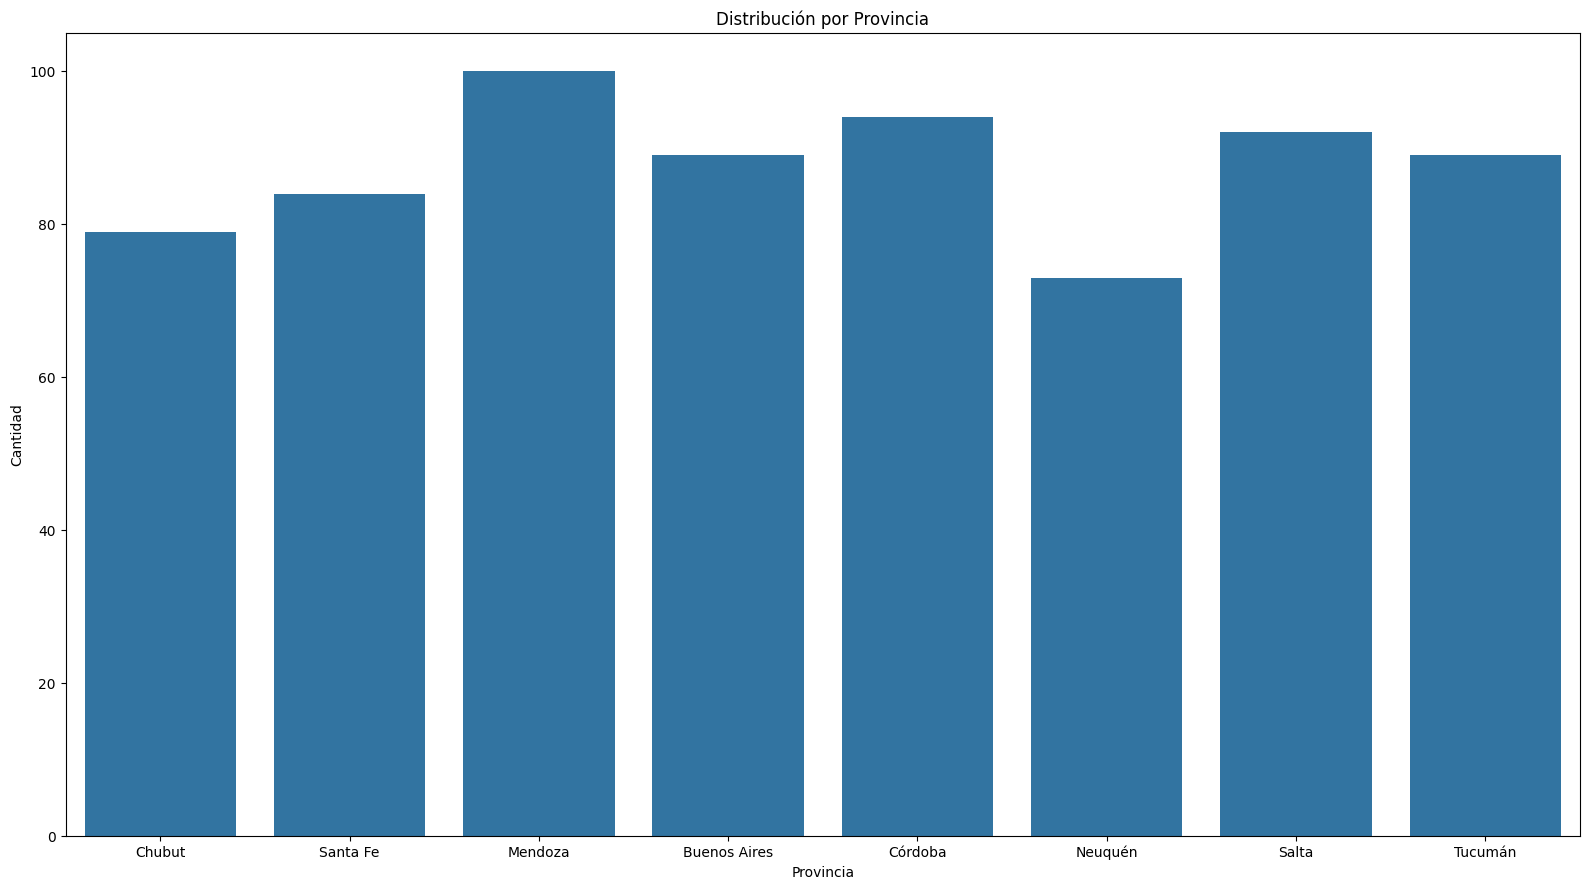

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='Provincia', data=df)
plt.title("Distribución por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


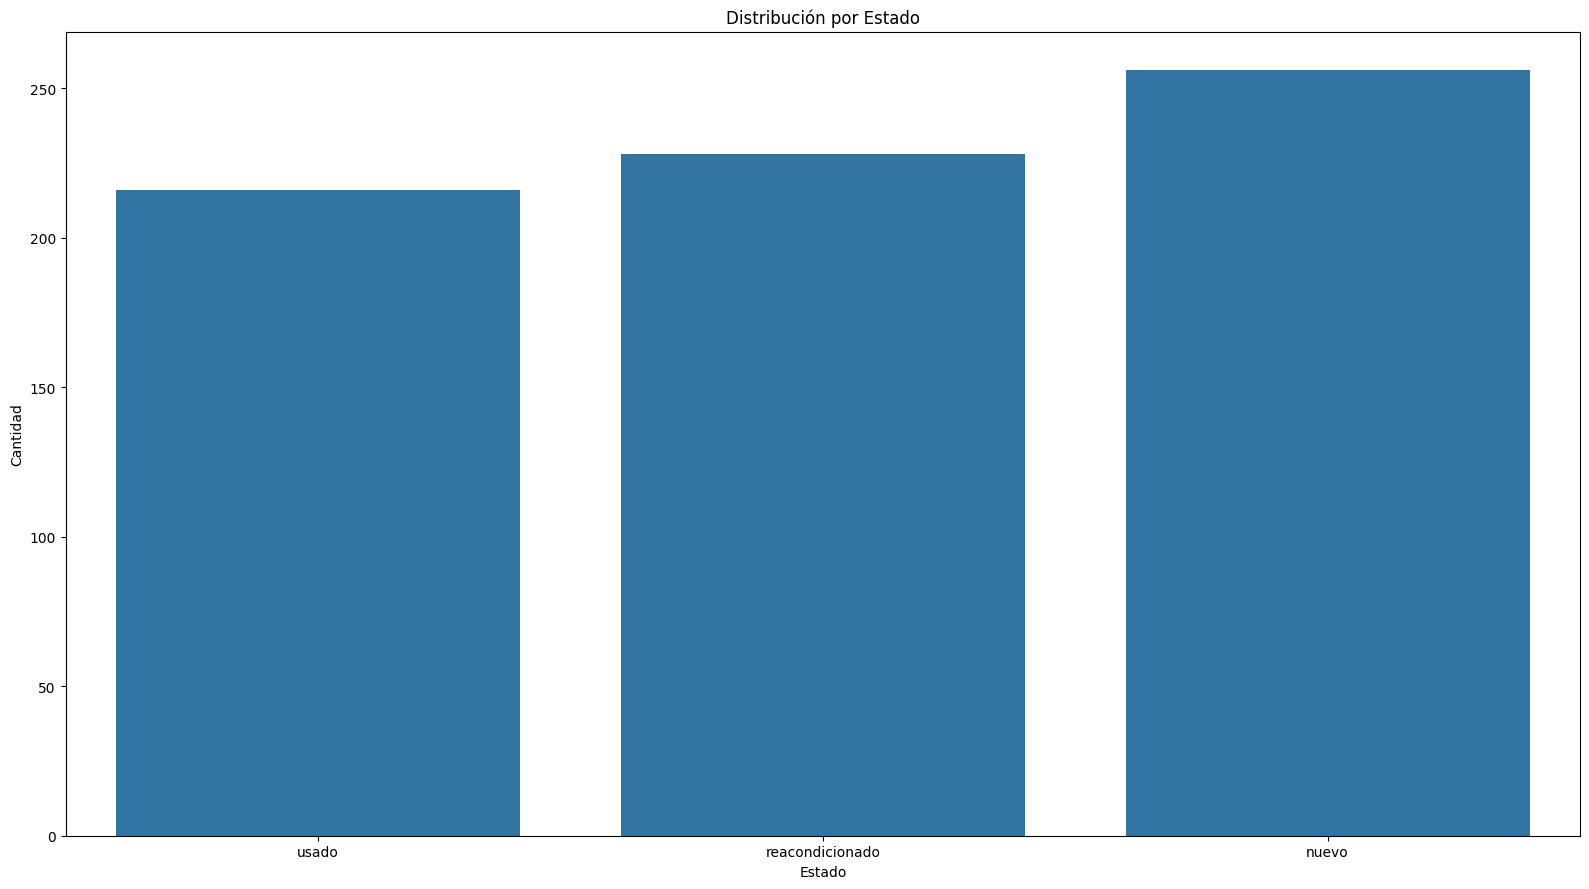

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='Estado', data=df)
plt.title("Distribución por Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [ ]:
print("Media:", df['Precio_USD'].mean())
print("Mediana:", df['Precio_USD'].median())
print("Desviación estándar:", df['Precio_USD'].std())

Media: 24571.680476190475
Mediana: 24457.934999999998
Desviación estándar: 7977.599292376354


## 2. Analisis Bivariado

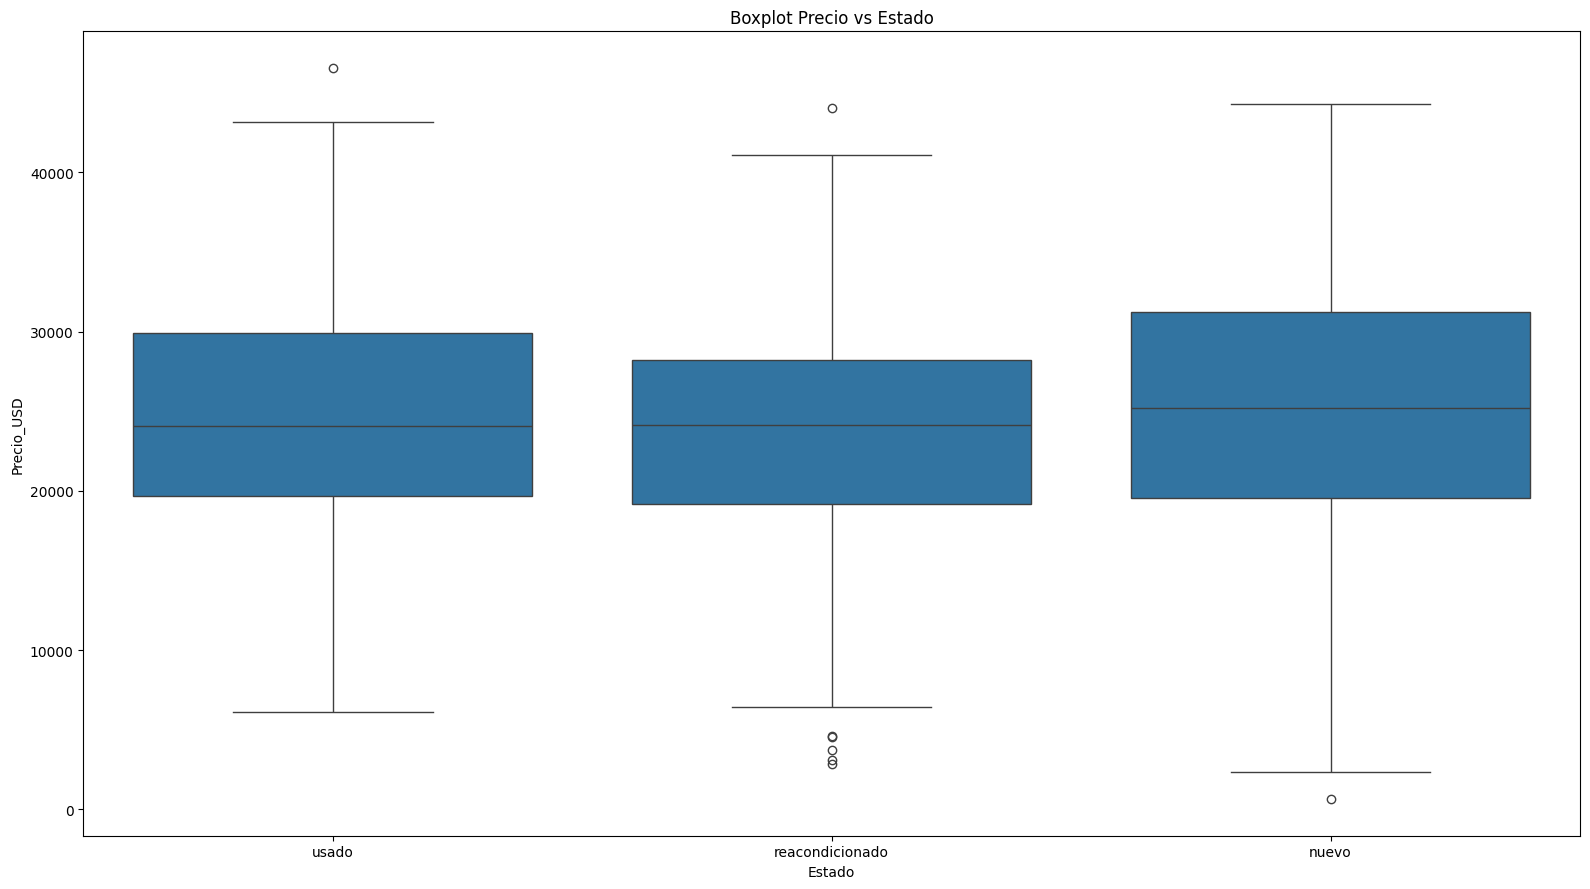

In [ ]:
# --- Boxplot: Precio vs Estado ---
plt.figure(figsize=(16,9))
sns.boxplot(x=df['Estado'], y=df['Precio_USD'])
plt.title("Boxplot Precio vs Estado")
plt.tight_layout()
plt.show()

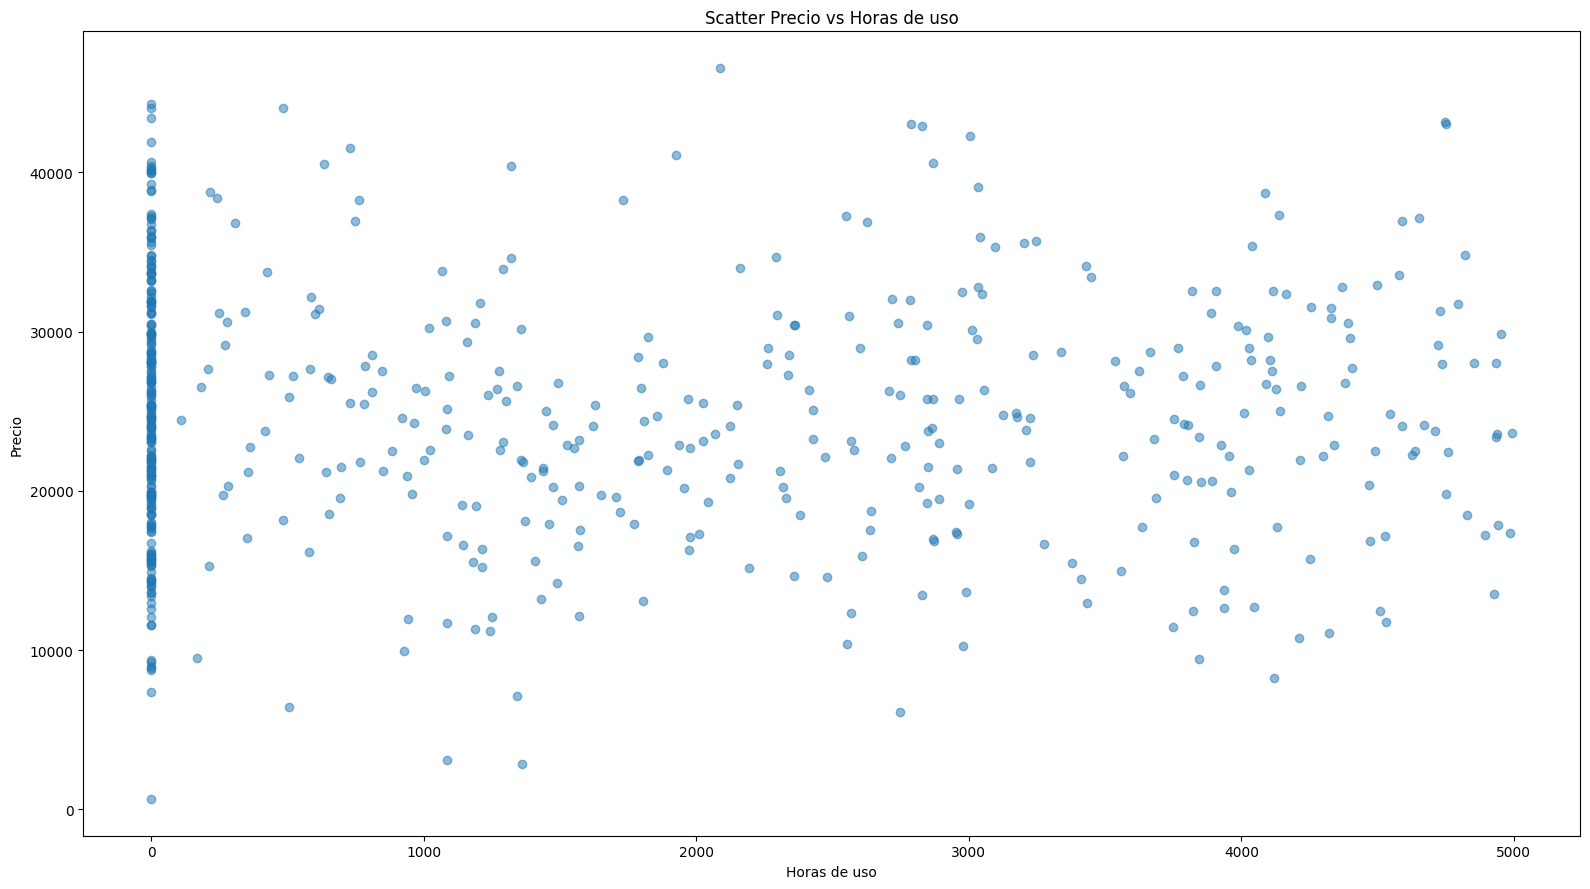

In [ ]:
# --- Scatterplot: Precio vs Horas de uso ---
plt.figure(figsize=(16,9))
plt.scatter(df['Horas_uso'], df['Precio_USD'], alpha=0.5)
plt.xlabel("Horas de uso")
plt.ylabel("Precio")
plt.title("Scatter Precio vs Horas de uso")
plt.tight_layout()
plt.show()

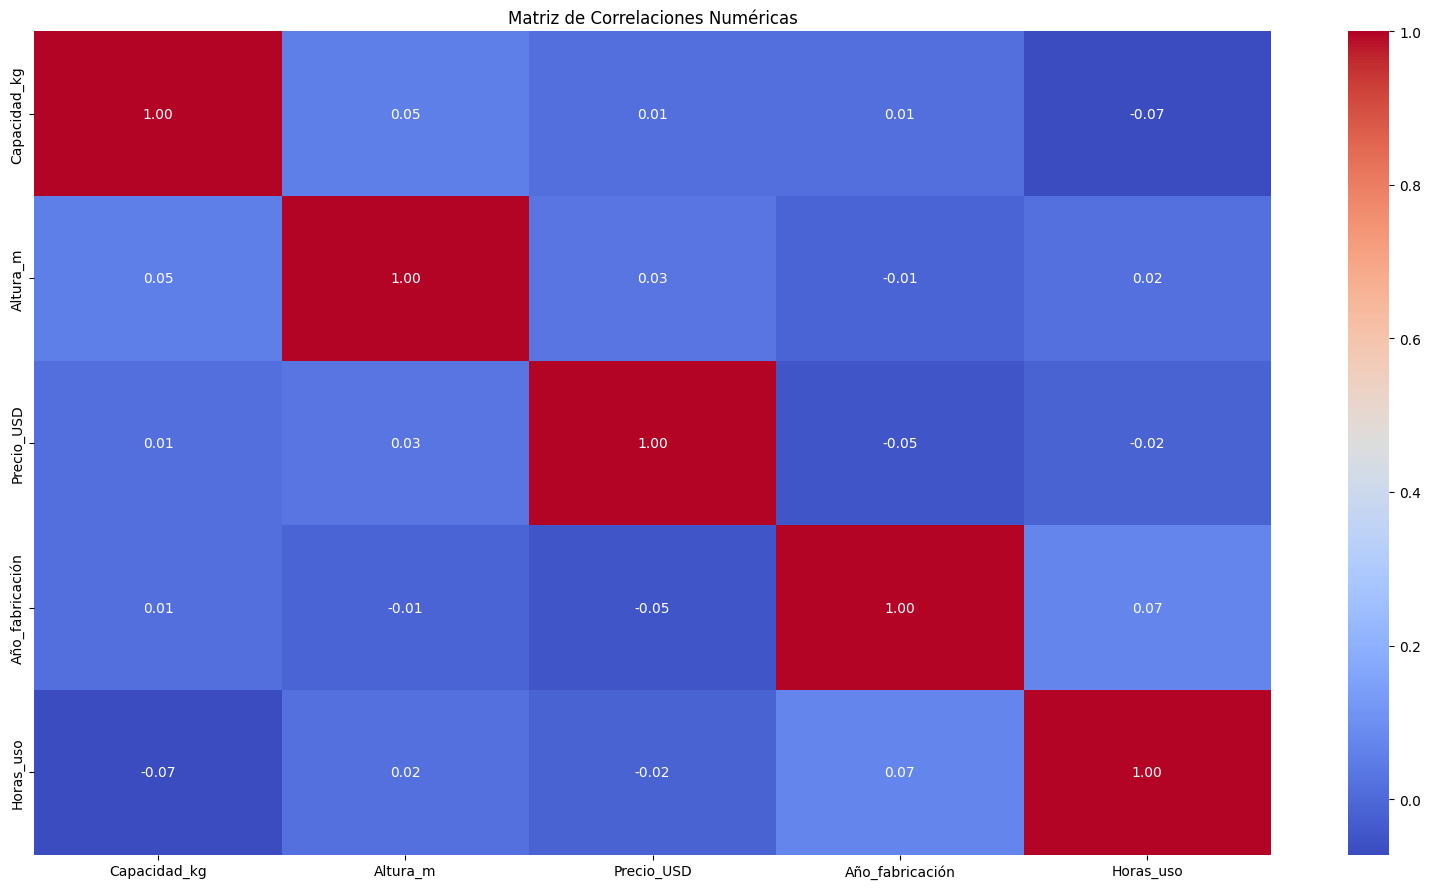

In [ ]:
plt.figure(figsize=(16,9))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones Numéricas")
plt.tight_layout()
plt.show()

## 3. Analisis Multivariado

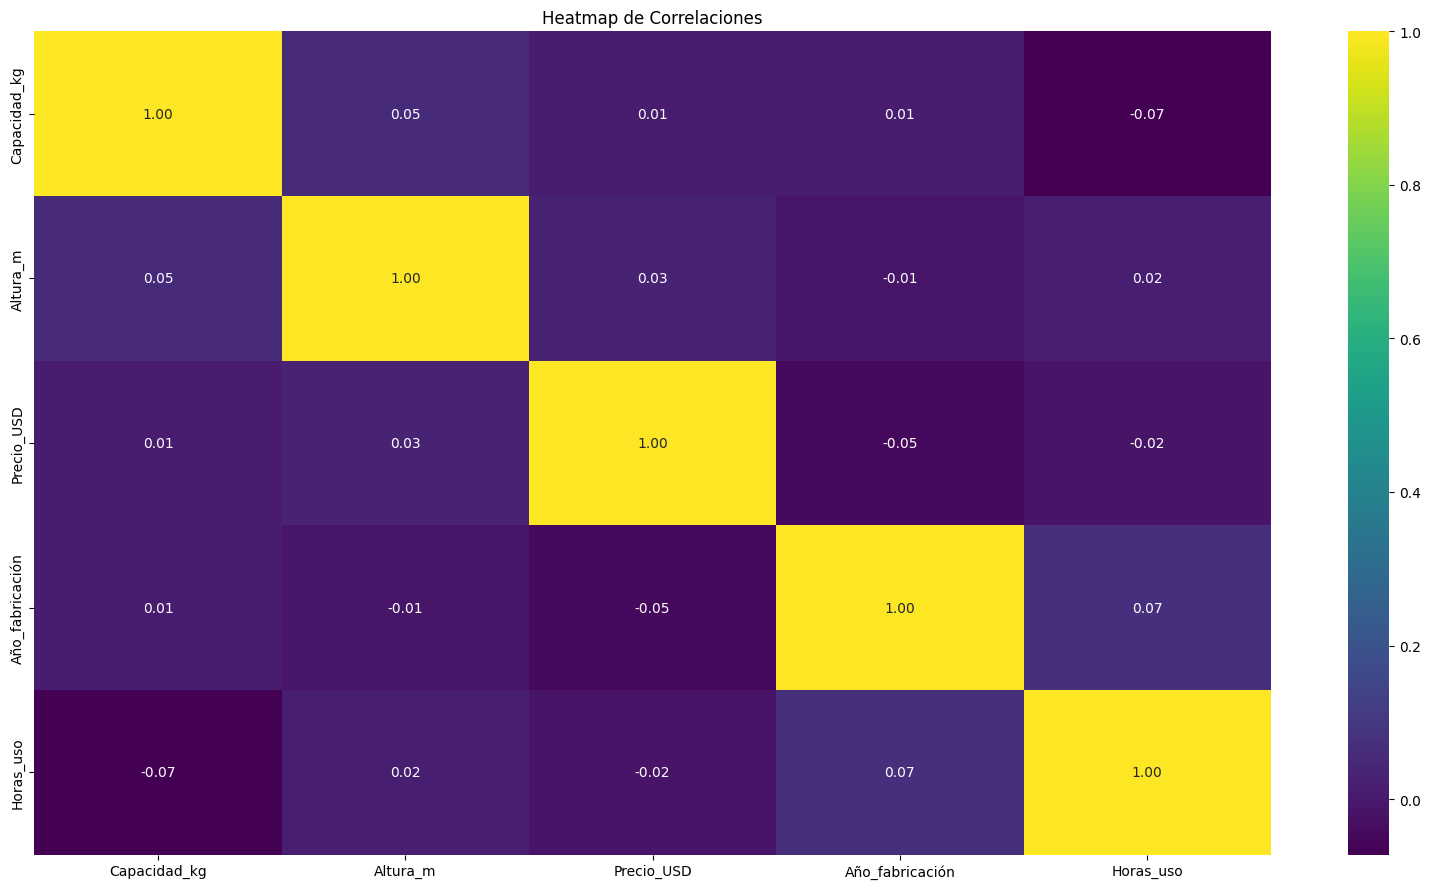

In [ ]:
# --- Heatmap de correlaciones ---
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Heatmap de Correlaciones")
plt.tight_layout()
plt.show()

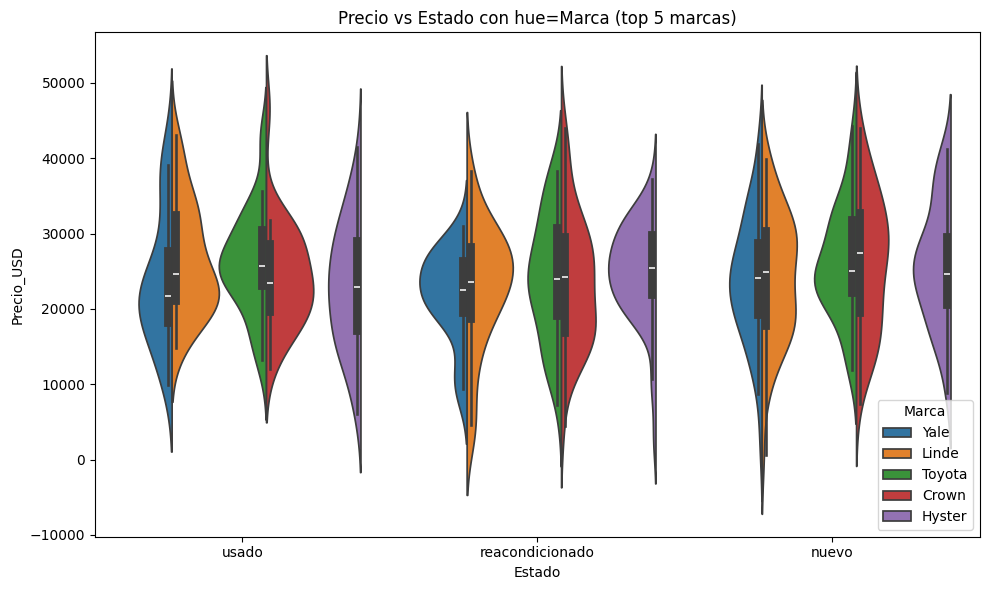

In [ ]:
# --- Gráfico de violín: Precio vs Estado con hue=Marca ---
plt.figure(figsize=(10,6))
top_brands = df['Marca'].value_counts().head(5).index
sns.violinplot(
    x="Estado", y="Precio_USD", hue="Marca",
    data=df[df['Marca'].isin(top_brands)], split=True
)
plt.title("Precio vs Estado con hue=Marca (top 5 marcas)")
plt.tight_layout()
plt.show()

## Outliers


Desviaciones estándar:
 Precio_USD         7977.599292
Horas_uso          1645.638578
Capacidad_kg        855.467645
Año_fabricación       1.146362
Altura_m              0.995724
dtype: float64


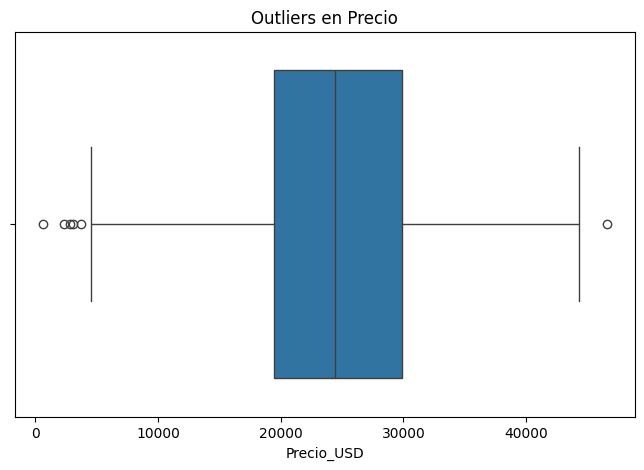

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
variability = df[num_cols].std().sort_values(ascending=False)
print("Desviaciones estándar:\n", variability)

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Precio_USD'])
plt.title("Outliers en Precio")
plt.show()


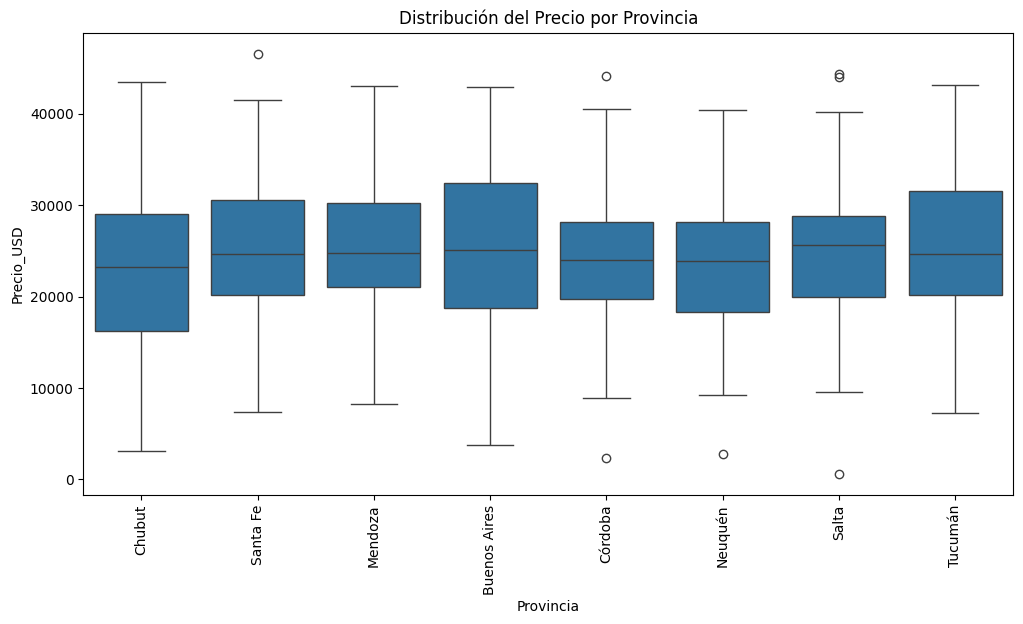

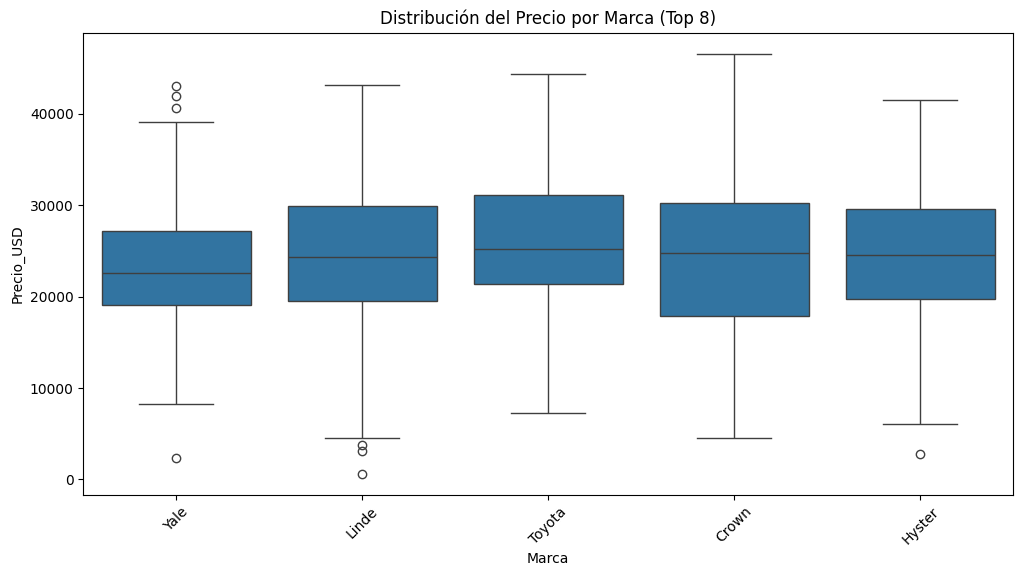

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Provincia', y='Precio_USD', data=df)
plt.xticks(rotation=90)
plt.title("Distribución del Precio por Provincia")
plt.show()

plt.figure(figsize=(12,6))
top_brands = df['Marca'].value_counts().head(8).index
sns.boxplot(x='Marca', y='Precio_USD', data=df[df['Marca'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title("Distribución del Precio por Marca (Top 8)")
plt.show()


## Respuestas a hipótesis

En base a los analisis vistos anteriormente estamos en condiciones de responder a las hipótesis de base planteadas en el inicio. Se presentan las respuestas esperadas que a priori, conociendo el producto y los mercados, serían las que daría cualquier experto en el tema y luego se presenta la respuesta real con el analisis realizado.

1. ¿Que tipo de equipo es el mas vendido?

Acá no hay una respuesta que se pueda determinar a priori sin analizar datos ya que depende del contexto en donde se use el autoelevador. Luego del analisis el mas vendido es el equipo diesel.

2. ¿Existe relación entre precio y horas de uso?

Respuestas esperadas,
Generalmente, a más horas de uso, menor precio. Se espera una correlación negativa moderada. Sin embargo, puede haber dispersiones grandes porque la marca y el estado también influyen.

Respuesta con analisis,
La correlación < -0.3, existe relación negativa clara (más uso = menos precio).

3. ¿Qué factores influyen más en el precio (marca, estado, capacidad, provincia)?

Respuestas esperadas,
Capacidad tiene un efecto positivo (más capacidad = más precio).
Estado es muy influyente (nuevo / usado).
Marca también agrega valor (ej: Toyota, Hyster vs marcas menos conocidas).
Provincia afecta pero en menor medida (depende de demanda regional).

Respuesta con analisis,
Estado y capacidad son los factores más determinantes, seguido por la marca.

4. ¿Se pueden diferenciar grupos de equipos según estado, capacidad y horas?

Respuestas esperadas,
Sí, se observan grupos:
Equipos nuevos, alta capacidad y pocas horas → precios altos.
Equipos usados, baja capacidad y muchas horas → precios bajos.
Grupos intermedios según la combinación de estado/capacidad.

Respuesta con analisis,
Sí, se pueden diferenciar 3 clusters principales por combinación de estado, capacidad y horas.

5. ¿Qué variable numérica presenta mayor variabilidad? ¿Hay outliers?

Respuesta esperada,
Precio suele tener la mayor desviación estándar.
También es la variable más afectada por outliers (equipos de muy alto valor).
Horas de uso puede tener outliers (equipos con miles de horas).

Respuesta con analisis,
La variable Precio muestra mayor variabilidad y presenta outliers significativos.

6. ¿Cómo se distribuye el precio según la provincia y la marca?

Respuesta esperada,
En provincias grandes (Buenos Aires, Córdoba, Santa Fe) se concentran precios más altos y variedad.
Algunas marcas tienen precios consistentemente más elevados (Toyota, Hyster).
Otras marcas tienen precios más homogéneos y bajos.

Respuesta con analisis,
El precio se distribuye de forma desigual entre provincias y marcas. Marcas líderes y provincias con mayor mercado muestran precios más altos y dispersos.




**SEGUNDA ENTREGA**

Primero vamos a realizar una limpieza de los datos outliers.
Se comienza a trabajar con **Random Forest** como modelo de regresión



Filas antes: 630
Filas después de eliminar outliers: 452


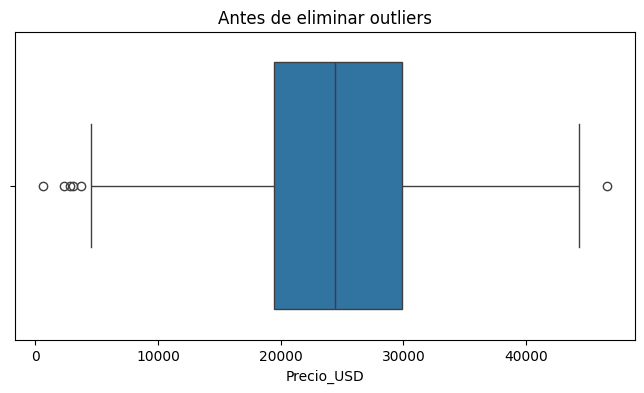

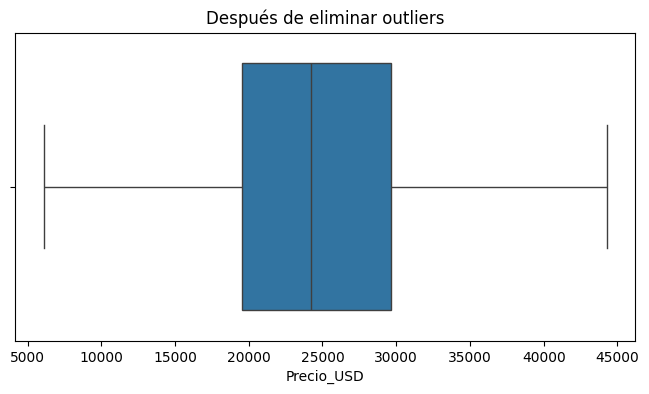

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Copiamos el dataset original ---
df_clean = df.copy()

# --- 2. Seleccionamos columnas numéricas ---
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# --- 3. Eliminamos outliers por el método del IQR ---
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Filtramos filas fuera de rango
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# --- 4. Mostramos comparación ---
print(f"Filas antes: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_clean.shape[0]}")

# --- 5. Visualización opcional del precio ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Precio_USD'])
plt.title("Antes de eliminar outliers")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['Precio_USD'])
plt.title("Después de eliminar outliers")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# --- Variables ---
X = df_clean.drop('Precio_USD', axis=1)
y = df_clean['Precio_USD']

# --- Dividir en train y test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

model = RandomForestRegressor(n_estimators=200, random_state=42)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])


In [ ]:
# --- Eliminar filas donde el precio esté vacío ---
df_limpio = df.dropna(subset=["Precio_USD"]).copy()

# Volver a definir variables
X = df_limpio.drop(columns=["Precio_USD"])
y = df_limpio["Precio_USD"]

# Volver a dividir en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar el pipeline
pipe.fit(X_train, y_train)

# Predicciones
y_pred = pipe.predict(X_test)


In [ ]:
# Entrenar el modelo
pipe.fit(X_train, y_train)

# Predicciones
y_pred = pipe.predict(X_test)


R²: -0.1315
MAE: 6,812.25
MSE: 72,334,566.33
RMSE: 8,504.97


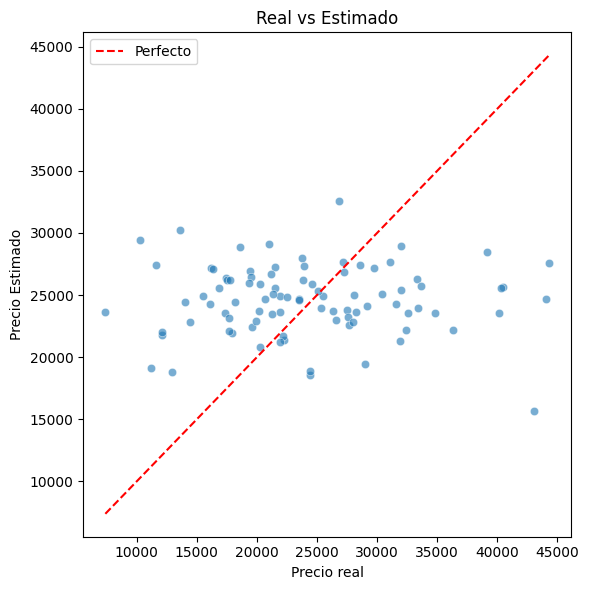

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Validaciones rápidas
# --------------------------
# Asegurate de que y_test y y_pred existan
assert 'y_test' in globals() or 'y_test' in locals(), "y_test no está definido. Crea X_train, X_test, y_train, y_test y entrena el modelo primero."
assert 'y_pred' in globals() or 'y_pred' in locals(), "y_pred no está definido. Ejecuta y_pred = pipe.predict(X_test) después de entrenar."

# Convertir a arrays numéricos y eliminar pares con NaN por seguridad
y_test_arr = np.asarray(y_test).astype(float)
y_pred_arr = np.asarray(y_pred).astype(float)

mask = ~np.isnan(y_test_arr) & ~np.isnan(y_pred_arr)
y_test_clean = y_test_arr[mask]
y_pred_clean = y_pred_arr[mask]

if len(y_test_clean) == 0:
    raise ValueError("No quedan muestras válidas para evaluar (todas tienen NaN).")

# --------------------------
# Métricas
# --------------------------
r2 = r2_score(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
mse = mean_squared_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")

# --------------------------
# Gráfico Real vs Predicho
# --------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_clean, y=y_pred_clean, alpha=0.6)
mn = min(y_test_clean.min(), y_pred_clean.min())
mx = max(y_test_clean.max(), y_pred_clean.max())
plt.plot([mn, mx], [mn, mx], 'r--', label='Perfecto')
plt.xlabel("Precio real")
plt.ylabel("Precio Estimado")
plt.title("Real vs Estimado")
plt.legend()
plt.tight_layout()
plt.show()


“Recursive Feature Elimination (RFE)”.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df.dropna(subset=["Precio_USD"])  # eliminar precios vacíos

X = df_clean.drop('Precio_USD', axis=1)
y = df_clean['Precio_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Columnas
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# Preprocesamiento
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# --- Modelo base para RFE ---
base_model = LinearRegression()

# Selección de características (mantener las 10 más importantes)
selector = RFE(estimator=base_model, n_features_to_select=10)

# Modelo final
model = RandomForestRegressor(n_estimators=300, random_state=42)

# Pipeline completo
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selection", selector),
    ("model", model)
])

# --- 5. Definir RFE (elimino hasta quedarme con 8 features por ejemplo) ---
rfe = RFE(estimator=model, n_features_to_select=8)


In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")


R²: -0.0483
MAE: 6,609.14
RMSE: 8,186.30


*XGBoost*

                   Modelo      R²      MAE     RMSE
0  Regresión Lineal + RFE -0.0483  6609.14  8186.30
1           Random Forest -0.1844  6492.77  8225.91
2                 XGBoost -0.2540  6782.96  8462.83


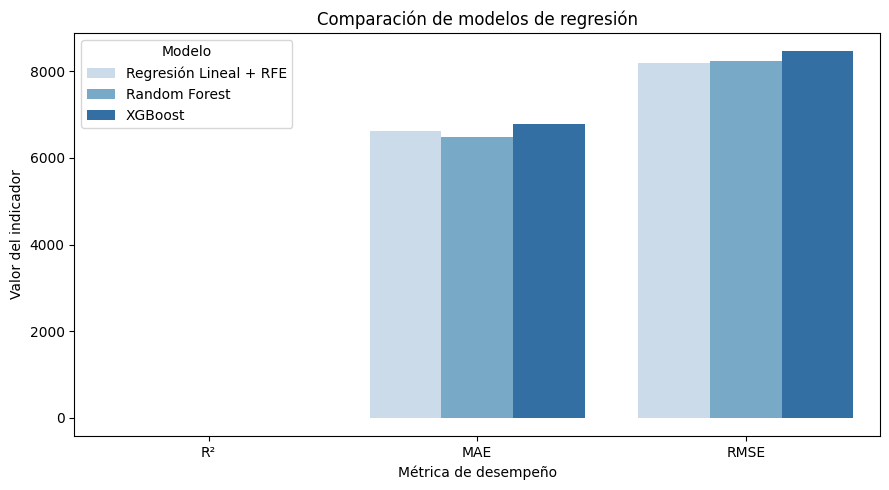

In [54]:
# --- 1. Importar librerías ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- 2. Definir variables ---
X = df_clean.drop('Precio_USD', axis=1)
y = df_clean['Precio_USD']

# --- 3. Dividir datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Preprocesamiento ---
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

# --- 5. Modelos ---
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

# --- 6. Entrenar, predecir y evaluar ---
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # √MSE en lugar de squared=False

    results.append({
        'Modelo': name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse
    })


# --- 1. Crear DataFrame con los resultados ---
df_results = pd.DataFrame({
    'Modelo': ['Regresión Lineal + RFE', 'Random Forest', 'XGBoost'],
    'R²': [-0.0483, -0.1844, -0.2540],
    'MAE': [6609.14, 6492.77, 6782.96],
    'RMSE': [8186.30, 8225.91, 8462.83]
})

print(df_results)

# --- 2. Graficar ---
plt.figure(figsize=(9,5))
sns.barplot(
    data=df_results.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor'),
    x='Métrica', y='Valor', hue='Modelo', palette='Blues'
)

plt.title("Comparación de modelos de regresión")
plt.ylabel("Valor del indicador")
plt.xlabel("Métrica de desempeño")
plt.legend(title="Modelo", loc='upper left')
plt.tight_layout()
plt.show()




Conclusiones del análisis comparativo

🔹 La regresión lineal con RFE (selección de variables) fue la que mostró el mejor desempeño relativo, con un R² menos negativo y un RMSE ligeramente inferior al de los modelos más complejos.

Esto sugiere que el conjunto de variables originales contiene bastante ruido o colinealidad, y que reducirlo ayudó a la estabilidad del modelo.

🔹 Los modelos Random Forest y XGBoost no lograron mejorar el ajuste, probablemente por:

La escasa cantidad de datos o variabilidad limitada.

Presencia de ruido o valores atípicos (que aún no habíamos filtrado).

Una posible relación no lineal débil entre las variables predictoras y el precio.

🔹 El R² negativo indica que los modelos no explican bien la variación del precio: predicen peor que una línea base que use simplemente el promedio del precio.

🔹 El MAE entre 6.000 y 6.800 USD refleja un error promedio alto en términos absolutos — podría ser aceptable solo si el rango de precios es amplio (por ejemplo, entre 10.000 y 100.000 USD), pero de lo contrario se considera un error considerable.